## 1. Librerias

In [17]:
# Librerias Generales
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime
import random

# Optimizadores/ EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## 2. Arquitectura de red neuronal

In [19]:
model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.3))


model.add(ks.layers.Conv2D(256, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(256, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Conv2D(256, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(256, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers.Conv2D(512, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(512, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(512, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(512, (3, 3), activation='relu',  padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers. Flatten())

model.add(ks.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(ks.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(ks.layers.Dense(10, activation='softmax'))

In [20]:
#Resumen modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_20 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_21 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_22 (Ba  (None, 32, 32, 32)       

## 3. Optimizadores


In [22]:
lr_schedule = ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:

callback_val_loss = EarlyStopping(monitor="val_loss", patience=50,restore_best_weights=True)
callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=50,restore_best_weights=True)

## 4. Preparamos los datos

In [23]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#x_train, = x_train / 255.0, 
x_test = x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

y_train_label = y_train

In [25]:
# Obtenemos un array con todas las labels de CIFAR10

cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Pintamos una muestra de imagenes del dataset, para comprobar que las imagenes estan en formato correcto. Ademas, comprobamos el tamaño del train y test.

Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


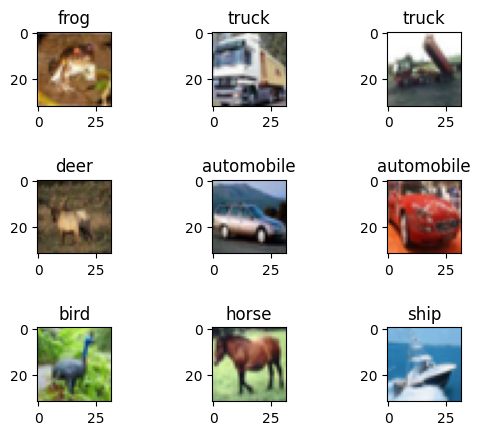

In [26]:
# Mostramos una muestra de las las imagenes del dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i]])

plt.subplots_adjust(hspace = 1)
plt.show()

Despues de comprobar el tamaño de la muestra de entrenamiento, verificamos como contamos con 50000 muestras de train y tomamos la decision de usar un 20% de las imagenes para la validación para que nuestra red convolucional tenga suficientes imagenes para entrenar y un conjunto lo suficientemente grande para validar.

In [27]:
# Realizar el split train/ validación
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [28]:
# Validamos el resultado
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000,)
Test: X=(10000, 32, 32, 3), y=(10000,)
Validation: X=(10000, 32, 32, 3), y=(10000,)


## 4.1. Data Augmentation

In [29]:
# Creamos nuevas imagenes con los siguientes parametros 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    channel_shift_range=50,
    horizontal_flip=True)

train_generator = train_datagen.flow(
    x_train,  # Aquí hay que usar datos NO re-escalados... de ahi que no usemos x_train_rescaled!
    y_train,
    batch_size=30)

validation_datagen = ImageDataGenerator(
    rescale=1./255)

validation_generator = validation_datagen.flow(
    x_val,
    y_val,
    batch_size=20)

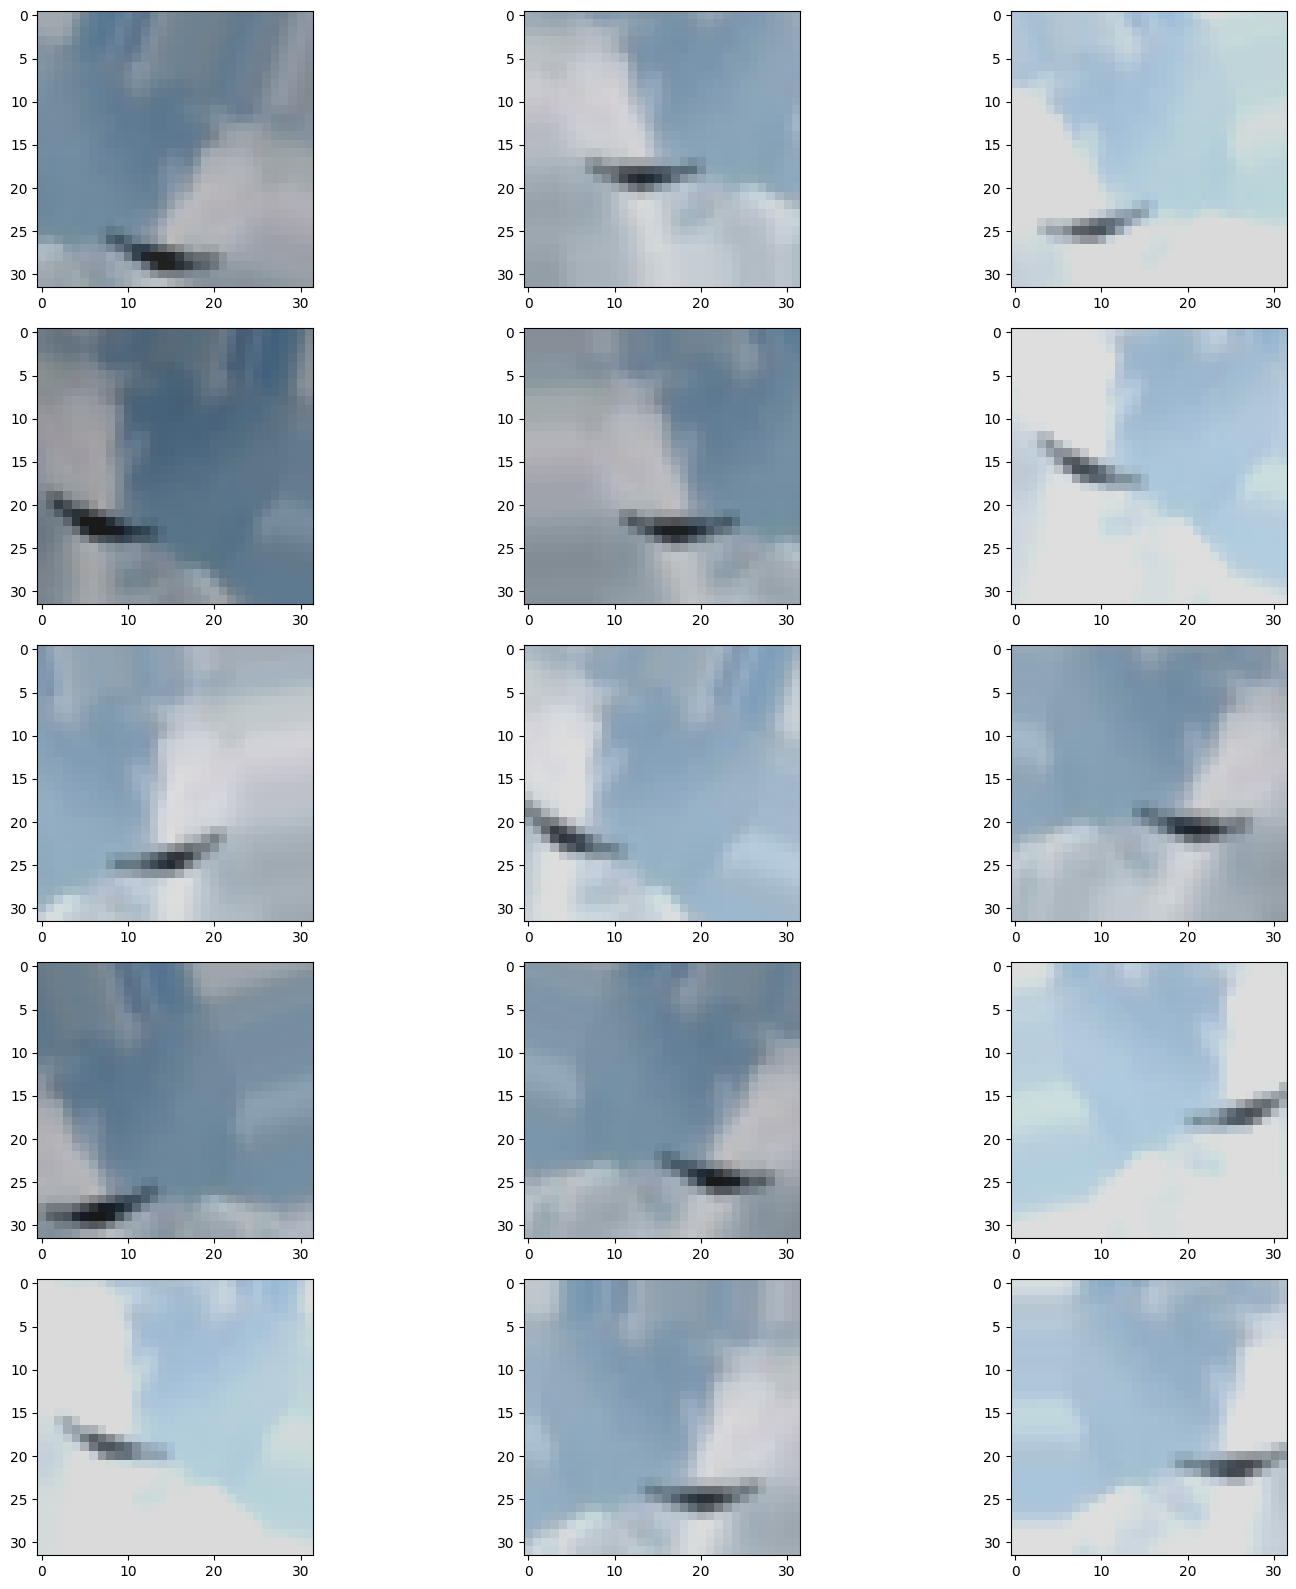

In [30]:
# Comprobamos la creación de imagenes
sample = random.choice(range(0,4999))

example_generator = train_datagen.flow(
    x_train[sample:sample+1],
    y_train[sample:sample+1],
    batch_size=1
)

plt.figure(figsize=(16,16))
for i in range(0,15):
  plt.subplot(5, 3, i+1)
  for X,y in example_generator:
    image = X[0]
    plt.imshow(image)
    break

plt.tight_layout()
plt.show()

## 5. Entrenamiento

Ajustamos el tamaño del batch, ponemos los epochs alto ya que contamos con un EarlyStopping, y utilizamos el data augmentation. Además, realizaremos la medición del tiempo de entrenamiento de la red.

In [31]:
t = time.perf_counter()

In [32]:
#Entrenamos el modelo
history = model.fit(train_generator, epochs=500,
                    use_multiprocessing=False, batch_size= 128,
                    validation_data=(validation_generator),
                    callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/500


2024-02-23 07:48:40.445502: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1334/1334 [==============================] - 56s 33ms/step - loss: 2.0018 - accuracy: 0.2350 - val_loss: 2.1946 - val_accuracy: 0.2548
Epoch 2/500
1334/1334 [==============================] - 43s 32ms/step - loss: 1.7623 - accuracy: 0.3270 - val_loss: 2.2088 - val_accuracy: 0.3044
Epoch 3/500
1334/1334 [==============================] - 43s 32ms/step - loss: 1.6496 - accuracy: 0.3857 - val_loss: 2.1068 - val_accuracy: 0.3006
Epoch 4/500
1334/1334 [==============================] - 43s 32ms/step - loss: 1.5658 - accuracy: 0.4300 - val_loss: 1.6232 - val_accuracy: 0.4513
Epoch 5/500
1334/1334 [==============================] - 43s 32ms/step - loss: 1.4938 - accuracy: 0.4648 - val_loss: 1.3132 - val_accuracy: 0.5478
Epoch 6/500
1334/1334 [==============================] - 43s 32ms/step - loss: 1.4083 - accuracy: 0.5074 - val_loss: 1.3646 - val_accuracy: 0.5429
Epoch 7/500
1334/1334 [==============================] - 43s 32ms/step - loss: 1.3441 - accuracy: 0.5401 - val_loss: 1.6126 - val_

In [33]:
#Medimos tiempo de entrenamiento.
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 2:32:09.326647


## 6. Evaluamos los resultados

In [34]:
# Medimos el accuracy en test.
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 90.270


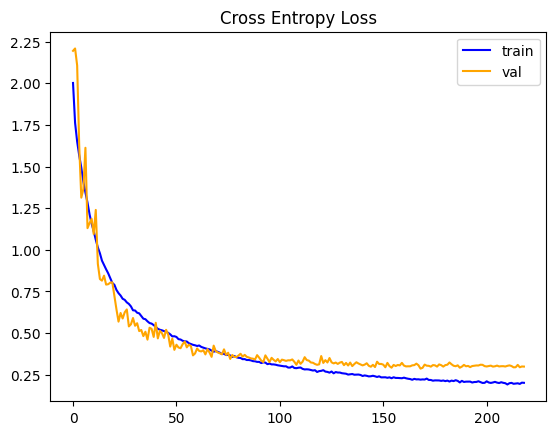

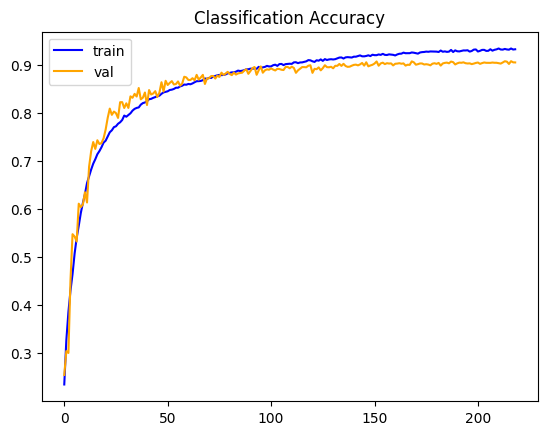

In [35]:
# Creamos las graficas de perdida y Acurracy del modelo 

plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [36]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


## 7. Guardamos el modelo


In [ ]:
model.save('cifar10_acc90.h5')